# BDTT Task 1

Extracting both the clinical trial files and the pharmaceutical file

In [0]:
# Coping file from the databricks files system to the local file system
data_file = "clinicaltrial_2021"
dbutils.fs.cp("FileStore/tables/" + data_file + ".zip", "file:/tmp/")

Out[1]: True

In [0]:
# Making the data_file variable accessible to the local file system
import os
os.environ['data_file'] = data_file

Next Extracting the file in the local file system

In [0]:
%sh
unzip -d /tmp/ /tmp/$data_file.zip

Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  


In [0]:
%sh
ls /tmp
rm -r /tmp/$data_file.zip

Rserv
RtmpZTmfxv
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2021.csv
clinicaltrial_2021.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
systemd-private-b447b66655a9487a87fc8fe6c72ebcbc-apache2.service-vNXF6h
systemd-private-b447b66655a9487a87fc8fe6c72ebcbc-ntp.service-514bBh
systemd-private-b447b66655a9487a87fc8fe6c72ebcbc-systemd-logind.service-KzqfOf
systemd-private-b447b66655a9487a87fc8fe6c72ebcbc-systemd-resolved.service-WgV9dh
tmp.jIxNJXPC4C


In [0]:
#move the extracted file from the local file system to databricks file system
dbutils.fs.mv("file:/tmp/" + data_file + ".csv", "FileStore/tables/", True)

Out[5]: True

In [0]:
#Display the content of the file
dbutils.fs.head("FileStore/tables/" + data_file + ".csv")

[Truncated to first 65536 bytes]
Out[6]: "Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions\r\nNCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||\r\nNCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|\r\nNCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|\r\nNCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|\r\nNCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|\r\nNCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate\r\nNCT02752438|Ankara University|Unkn

In [0]:
# Create an RDD for the clinicaltrial dataset
clinicaltrialRDD = sc.textFile("/FileStore/tables/" + data_file + ".csv")

In [0]:
#Displaying first 10 rows of the RDD
clinicaltrialRDD.take(10)

Out[8]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|',
 'NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate',
 'NCT02752438|Ankara University|Unknown status|May 2016|Jul 2

In [0]:
#Removing the header from the RDD
clinicaltrialNoHeaderRDD = clinicaltrialRDD.mapPartitionsWithIndex(lambda id_x, iter: list(iter)[1:] if(id_x == 0) else iter)

In [0]:
#Display first 10 rows of the RDD with header removed
clinicaltrialNoHeaderRDD.take(10)

Out[10]: ['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|',
 'NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate',
 'NCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|Observational [Patient Registry]|Apr 2016|Hypoventilation|',
 'NCT02753543|

Extracting the pharmaceutical dataset

In [0]:
# Coping file from the databricks files system to the local file system
data_file2 = "pharma"
dbutils.fs.cp("FileStore/tables/" + data_file2 + ".zip", "file:/tmp/")

Out[11]: True

In [0]:
# Making the data_file2 variable accessible to the local file system
import os
os.environ['data_file2'] = data_file2

In [0]:
%sh
unzip -d /tmp/ /tmp/$data_file2.zip

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
%sh
ls /tmp
rm -r /tmp/$data_file2.zip

Rserv
RtmpZTmfxv
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.csv
pharma.zip
systemd-private-b447b66655a9487a87fc8fe6c72ebcbc-apache2.service-vNXF6h
systemd-private-b447b66655a9487a87fc8fe6c72ebcbc-ntp.service-514bBh
systemd-private-b447b66655a9487a87fc8fe6c72ebcbc-systemd-logind.service-KzqfOf
systemd-private-b447b66655a9487a87fc8fe6c72ebcbc-systemd-resolved.service-WgV9dh
tmp.jIxNJXPC4C


In [0]:
#move the extracted file from the local file system to databricks file system
dbutils.fs.mv("file:/tmp/" + data_file2 + ".csv", "FileStore/tables/", True)

Out[15]: True

In [0]:
# Create an RDD for the pharmacitical dataset 
pharmaRDD = sc.textFile("/FileStore/tables/" + data_file2 + ".csv")

In [0]:
#Removing the header from the pharmaRDDRDD 
dataset_header = pharmaRDD.first()
pharma_NoHeader_RDD = pharmaRDD.filter(lambda line: line != dataset_header)

In [0]:
# display first 5 rows of the RDD
pharma_NoHeader_RDD.take(5)

Out[18]: ['"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid, biliary and peripheral vascular products.","federal","agency action","Justice Department Civil Division","civil","","","","","","","","","","","","USA","Illinois","publicly traded","ABT","pharmaceuticals","pharmaceuticals","https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians",""',
 '"Abbott Laboratories Inc.","AbbVie","$1,500,000,000","$0","$1,500,000,000","2012","20120507","healthcare-related offenses","off-label or unapproved promotion of medical products","","Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to

In [0]:
# Function that returns all the columns of the dataset
# The function takes in the dataset, split using "|" as delimeter
# Assigns each column to a variable and returns the columns
def ParseLine (line):
    delimiter = "|"
    fields = line.split(delimiter)
    Id = fields[0]
    Sponsors = fields[1]
    Status = fields[2]
    StartDate = fields[3]
    CompletionDate = fields[4]
    Type = fields[5]
    SubmissionDate = fields[6]
    Conditions = fields[7]
    Interventions = fields[8]
    return (Id, Sponsors, Status, StartDate, CompletionDate, Type,SubmissionDate, Conditions,Interventions)

# Parse the above function to map the RDD
clinicaltrialRDD = clinicaltrialNoHeaderRDD.map(ParseLine)

# Question 1

In [0]:
# Capture the ID column which has an index 0, and map it, 
# which is unique and represents distinct studies
distinct_clinicaltrialsRDD = clinicaltrialRDD.map(lambda x : x[0])

# Count the number distinct clinical trials in the dataset
distinct_clinicaltrialsRDD.count()

Out[20]: 387261

# Question 2

In [0]:
# Extract the Type column
Type = clinicaltrialRDD.map(lambda x: x[5])

# Count the frequencies of each type
TypeCountRDD = Type.countByValue()

# Sort the results by frequency (in descending order)
SortedTypeCounts = sorted(TypeCountRDD.items(), key=lambda x: -x[1])

# Print the results
for Type, count in SortedTypeCounts:
    print(Type, count)

Interventional 301472
Observational 77540
Observational [Patient Registry] 8180
Expanded Access 69


# Question 3

In [0]:
# Extract the Conditions column and split it by comma
conditionsRDD = clinicaltrialRDD.map(lambda x: x[7].split(","))

# Remove empty elements from the list
conditions = conditionsRDD.flatMap(lambda x: [c.strip() for c in x if c.strip() != ""])

# map each condition with 1
# Count the frequency of each condition
# Return the top 5 conditions by frequency
top_5_conditions = conditions.map(lambda x: (x, 1)) \
                            .reduceByKey(lambda x, y: x + y) \
                            .takeOrdered(5, key=lambda x: -x[1])

# Print the top 5 conditions with their frequencies
for condition, count in top_5_conditions:
    print(condition, count)

Carcinoma 13389
Diabetes Mellitus 11080
Neoplasms 9371
Breast Neoplasms 8640
Syndrome 8032


# Question 4

In [0]:
# Function that returns all the columns of the dataset
def ParsePharma (line):
    delimeter = ","
    fields = line.split(delimeter)
    pharmaceutical_companies = fields[1]
    return (pharmaceutical_companies)

# Parse the above function to map the RDD
PharmaceuticalCompaniesRDD = pharma_NoHeader_RDD.map(ParsePharma)
PharmaceuticalCompaniesSet = set(PharmaceuticalCompaniesRDD.map(lambda x : x.replace('"', '')).collect())

# select the sponsors column,map it with 1 and count the number of occurence of each sponsor
sponsors_count = clinicaltrialRDD.map(lambda x: x[1]) \
                                 .map(lambda x: (x, 1)) \
                                 .reduceByKey(lambda a, b: a + b)

# Filter out the pharmaceutical company in the sponsors RDD and sort the value in descending order
non_pharma_sponsors = sponsors_count.filter(lambda x: x[0] not in PharmaceuticalCompaniesSet) \
                                    .sortBy(lambda x: -x[1])

# Print the results
non_pharma_sponsors.take(10)

Out[23]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

In [0]:
sponsors_count.take(5)

Out[24]: [('The University of Hong Kong', 757),
 ('Universidade Federal do Rio de Janeiro', 103),
 ('University of Roma La Sapienza', 289),
 ('Ankara University', 107),
 ('Ruijin Hospital', 200)]

# Question 5

In [0]:
# function to sort months in the order of Jan to Dec
def SortMonth(month):
    if month == "Jan":
        return 1
    elif month == "Feb":
        return 2
    elif month == "Mar":
        return 3
    elif month == "Apr":
        return 4
    elif month == "May":
        return 5
    elif month == "Jun":
        return 6
    elif month == "Jul":
        return 7
    elif month == "Aug":
        return 8
    elif month == "Sep":
        return 9
    elif month == "Oct":
        return 10
    elif month == "Nov":
        return 11
    else:
        return 12

In [0]:
# Check clinicaltrial dataset file and define the year
def CheckYear(clinical_data):
    if len(clinical_data) >= 4 and isinstance(clinical_data, str):
        LastFourChar = clinical_data[-4:]
        if LastFourChar.isnumeric():
            return LastFourChar
    return None

# Get the year from the file name
year = CheckYear(data_file)

In [0]:
#Check if the completion date ends with 'year' and if the status reads Completed
CompletedStudiesByYear = clinicaltrialRDD.filter(lambda x: x[4].endswith(year) and x[2] == "Completed")

# map each month of the completion date to 1  and count completed studies per month
CompletedStudiesPerMonth = CompletedStudiesByYear.map(lambda x: (x[4][:3], 1)) \
    .reduceByKey(lambda a, b: a + b)

# sort the results by month in the order of Jan to Dec
SortedCompletedStudiesPerMonth = CompletedStudiesPerMonth.map(lambda x: (x[0], x[1], SortMonth(x[0]))) \
    .sortBy(lambda x: x[2]) \
    .map(lambda x: (x[0], x[1]))

# display the results
for month, count in SortedCompletedStudiesPerMonth.collect():
    print(f"{month}: {count}")

Jan: 1131
Feb: 934
Mar: 1227
Apr: 967
May: 984
Jun: 1094
Jul: 819
Aug: 700
Sep: 528
Oct: 187


# Question 5 - Visualization

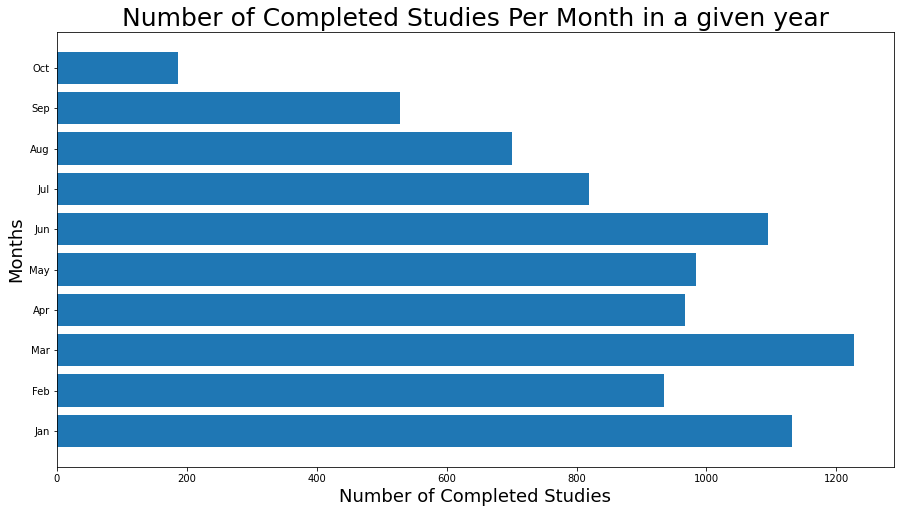

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Create object for the figure and axis 
fig, ax = plt.subplots(figsize=(15, 8))

# Convert RDD to a PySpark Dataframe with column names
# Convert the PySpark Dataframe to a Pandas Dataframe
data = SortedCompletedStudiesPerMonth.toDF(["Month", "Count"]).toPandas()

# Assign the labels and values
labels = data["Month"]
values = data["Count"]

# create a horizontal bar plot
plt.barh(labels, values)

# set the title and axis labels
plt.title('Number of Completed Studies Per Month in a given year', fontsize=25)
plt.xlabel('Number of Completed Studies', fontsize=18)
plt.ylabel('Months', fontsize=18)

# show the plot
plt.show()

# Further analysis 1
List the top 10 Medications (from Interventions) with their frequencies.

In [0]:
# Extract the Intervention column and split it by comma
interventionsRDD = clinicaltrialRDD.map(lambda y: y[8].split(","))

# remove empty elements and leading and trailing whitespace from list 
# Count the frequency of each medication(interventions)
# Get the top 5 medications by frequency
top_10_interventions = interventionsRDD.flatMap(lambda x: [c.strip() for c in x if c.strip() != ""]) \
                                .map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y) \
                                .takeOrdered(10, key=lambda x: -x[1])

# Print the top 15 medications(interventions) with their frequencies
for intervention, count in top_10_interventions:
    print(intervention, count)

Paclitaxel 3225
Cyclophosphamide 3012
Dexamethasone 2516
Carboplatin 2392
Antibodies 2335
Vaccines 2214
Gemcitabine 2195
Bevacizumab 2005
Docetaxel 1953
Rituximab 1740


# Further analysis 1 - Visualization

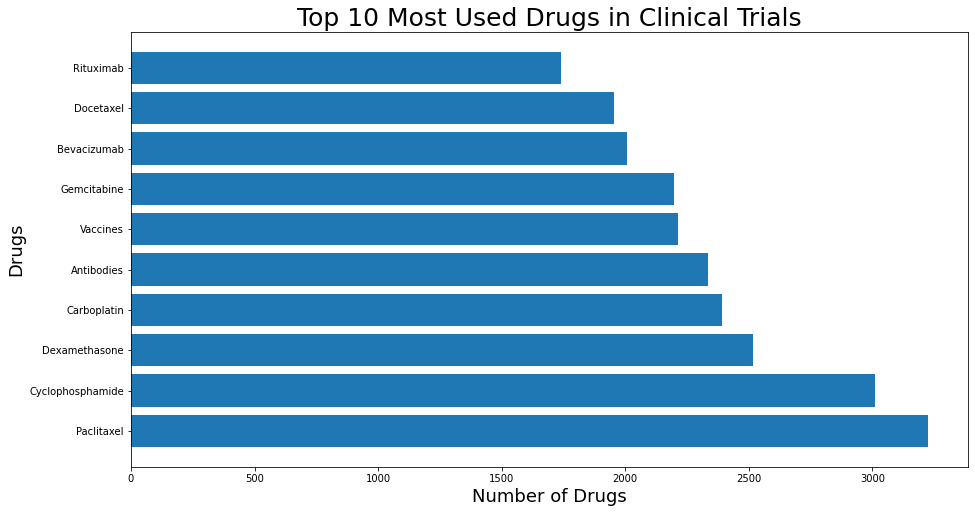

In [0]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 8))

# extract the labels and values
labels = [drug[0] for drug in top_10_interventions]
values = [count[1] for count in top_10_interventions]

# create a horizontal bar plot
plt.barh(labels, values)

# set the title and axis labels
plt.title('Top 10 Most Used Drugs in Clinical Trials', fontsize=25)
plt.xlabel('Number of Drugs', fontsize=18)
plt.ylabel('Drugs', fontsize=18)

# show the plot
plt.show()